# 9. Matplotlib

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 9.2 繪製 多項式

In [4]:
func = np.poly1d(np.array([1, 2, 3, 4]).astype(float))
func

poly1d([ 1.,  2.,  3.,  4.])

In [5]:
x = np.linspace(-10, 10, 30)

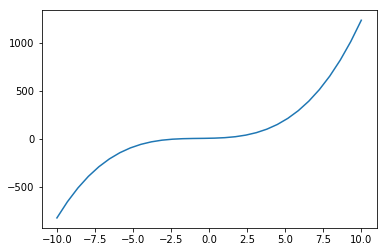

In [14]:
y = func(x)
plot(x, y)
plt.xlabel = 'x'
plt.ylabel = 'y'
show()

## 9.4 格式字符號

In [13]:
func = np.poly1d(np.array([1, 2, 3, 4]).astype(float))
func1 = func.deriv(m = 1)

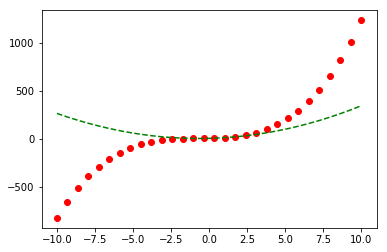

In [17]:
x = np.linspace(-10, 10, 30)
plot(x, func(x), 'ro', x, func1(x), 'g--')
plt.xlabel = 'x'
plt.ylabel = 'y'
show()

## 9.6 subplot

In [18]:
x = np.linspace(-10, 10, 30)

func = np.poly1d(np.array([1, 2, 3, 4]).astype(float))
func1 = func.deriv(m = 1)
func2 = func.deriv(m = 2)

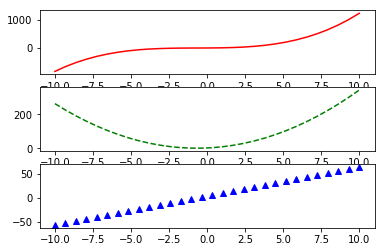

In [23]:
plt.subplot(311)
plot(x, func(x), 'r-')
plt.xlabel = 'x'
plt.ylabel = 'y' 

plt.subplot(312)
plot(x, func1(x), 'g--')
plt.xlabel = 'x'
plt.ylabel = 'y'

plt.subplot(313)
plot(x, func2(x), 'b^')
plt.xlabel = 'x'
plt.ylabel = 'y'

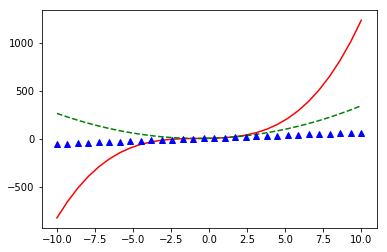

In [24]:
plot(x, func(x), 'r-')
plot(x, func1(x), 'g--')
plot(x, func2(x), 'b^')
plt.xlabel = 'x'
plt.ylabel = 'y'

## 9.7 財經

## 9.8 全年股票價格

In [27]:
%pylab?

In [54]:
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from matplotlib.dates import MonthLocator
from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.finance import candlestick_ochl
import sys
from datetime import date
today = date.today()
start = (today.year - 1, today.month, today.day)

In [55]:
alldays = DayLocator()
months = MonthLocator()
month_formatter = DateFormatter('%b %Y')

In [56]:
symbol = 'DISH'
quotes = quotes_historical_yahoo_ochl(symbol, start, today)

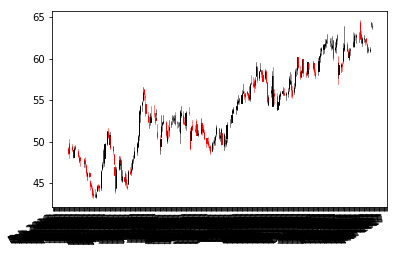

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis.set_major_locator(alldays)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(month_formatter)
candlestick_ochl(ax, quotes)
fig.autofmt_xdate()
plt.show()

## 9.9 直方圖

In [63]:
closes = np.array(quotes).T[4]

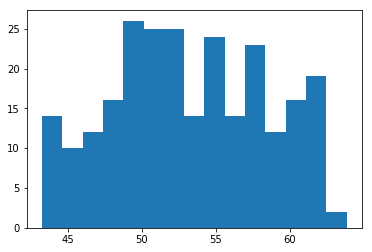

In [64]:
plt.hist(closes, int(np.sqrt(len(closes))))
show()

## 9.11 對數座標圖

## 9.12 股票成交量

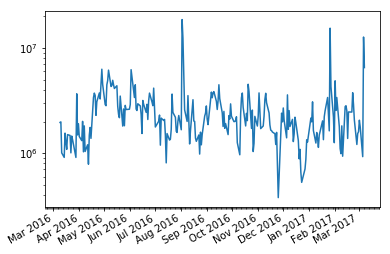

In [68]:
quos = np.array(quotes)
dates = quos.T[0]
volumes = quos.T[5]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.semilogy(dates, volumes)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(month_formatter)
fig.autofmt_xdate()
show()

# 9.13 Scatter

## 9.14 股票收益率 和成交量變化的散點圖

In [82]:
rets = np.diff(closes) / closes[:-1]
volchange = np.diff(volumes) / volumes[:-1]

In [92]:
ax.scatter(rets, volchange, c = rets * 100, s = volchange * 100, alpha = 0.5)
ax.set_title('Close and Volume')
ax.grid(True)
show()

/home/wei/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


## 9.15 著色

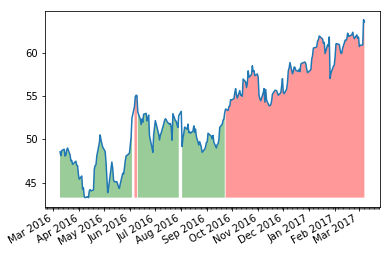

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot(dates, closes)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(month_formatter)
fig.autofmt_xdate()

plt.fill_between(dates, closes.min(), closes, where = closes > closes.mean(), facecolor = 'red', alpha = 0.4)
plt.fill_between(dates, closes.min(), closes, where = closes < closes.mean(), facecolor = 'green', alpha = 0.4)
show()

## 9.17 圖例和註釋

## 9.18 使用圖例和註釋

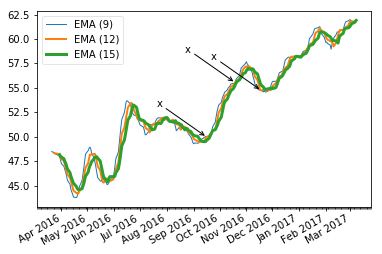

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111) 

emas = []
for i in range(9, 18, 3):
    weights = np.exp(np.linspace(-1., 0., i))
    weights /= weights.sum()
    ema = np.convolve(weights, closes)[i-1: -i+1]
    idx = (i - 6) / 3
    ax.plot(dates[i-1:], ema, lw = idx, label = 'EMA (%s)' %(i))
    data = np.column_stack((dates[i-1:], ema))
    emas.append(np.rec.fromrecords(data, names = ['dates', 'ema']))    
    
first = emas[0]['ema'].flatten()
second = emas[1]['ema'].flatten()
bools = np.abs(first[-len(second):] - second) / second < 0.0001
xpoints = np.compress(bools, emas[1])  

for xpoint in xpoints:
    ax.annotate('x', xy = xpoint, textcoords = 'offset points', xytext = (-50, 30), arrowprops = dict(arrowstyle='->'))
leg = ax.legend(loc = 'best', fancybox = True)
leg.get_frame().set_alpha(0.5)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(month_formatter)
fig.autofmt_xdate()

show()

## 9.20 3D 繪圖

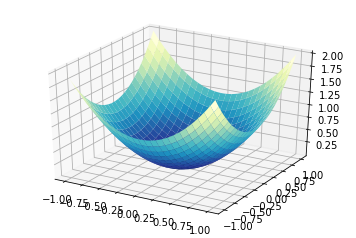

In [125]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

u = np.linspace(-1, 1, 100)
x, y = np.meshgrid(u, u)
z = x**2 + y**2
ax.plot_surface(x, y, z, rstride = 4, cstride = 4, cmap = cm.YlGnBu_r)

## 9.21 等高線

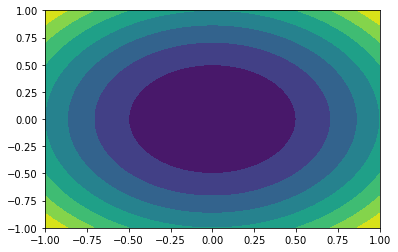

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111) 

u = np.linspace(-1, 1, 100)
x, y = np.meshgrid(u, u)
z = x**2 + y**2
 
ax.contourf(x, y, z)

## 9.23 動畫

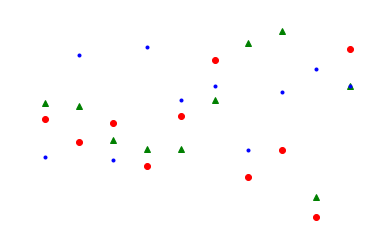

In [136]:
import matplotlib.animation as animation

N = 10

def update(data):
    circles.set_ydata(data[0])
    triangles.set_ydata(data[1])
    return circles, triangles

def generate():
    while True: 
        yield np.random.rand(2, N)
        
fig = plt.figure()
ax = fig.add_subplot(111)  

x = np.random.rand(N)
y = np.random.rand(N)
z = np.random.rand(N)

circles, triangles, dots = ax.plot(x, 'ro', y, 'g^', z, 'b.')
ax.set_ylim(0, 1)
plt.axis('off')

anim = animation.FuncAnimation(fig, update, generate, interval = 150)

show()